In [2]:
import requests
import json
import datetime
import pandas
from pandas.io.json import json_normalize

In [31]:
username="your-username"
password="your-password"
query="@TK_Presse"
r = requests.get("https://" + username +":" + password +"@cdeservice.eu-gb.mybluemix.net:443/api/v1/messages/search?q=" + query)

In [32]:
print r

<Response [200]>


In [33]:
res=r.json()
print "Status: ", r.status_code
res

Status:  200


{u'related': {u'next': {u'href': u'https://cdeservice.eu-gb.mybluemix.net:443/api/v1/messages/search?q=%40TK_Presse&from=100&size=100'}},
 u'search': {u'current': 100, u'results': 1044},
 u'tweets': [{u'cde': {u'author': {u'gender': u'unknown',
     u'location': {u'city': u'Landkreis M\xfcnchen',
      u'country': u'Germany',
      u'state': u'Bavaria'},
     u'maritalStatus': {u'evidence': u'', u'isMarried': u'unknown'},
     u'parenthood': {u'evidence': u'', u'isParent': u'unknown'}},
    u'content': {u'sentiment': {u'evidence': [{u'polarity': u'NEGATIVE',
        u'sentimentTerm': u'depressiv'}],
      u'polarity': u'NEGATIVE'}}},
   u'message': {u'actor': {u'displayName': u'BR - Rubrik Ratgeber',
     u'favoritesCount': 58,
     u'followersCount': 1857,
     u'friendsCount': 266,
     u'id': u'id:twitter.com:59762504',
     u'image': u'https://pbs.twimg.com/profile_images/459628661654552576/1bIZ8RW5_normal.png',
     u'languages': [u'de'],
     u'link': u'http://www.twitter.com/BR_

In [34]:
df = json_normalize(res['tweets'])
#df['timestampstr']=df['expire_time_gmt'].map(lambda x: datetime.datetime.utcfromtimestamp(x))
#df[['expire_time_gmt','timestampstr','temp','precip_hrly']]

In [35]:
df['message.body']

0     RT @TK_Presse: So #depressiv ist Deutschland. ...
1     @TK_Presse @aerztezeitung den bekommt man in d...
2     RT @LUPCOM: THX4RT/FAV/MT ;) #ff \n@ToyotaEqui...
3     RT @slangemak: "8min intensiver Sport sind so ...
4     RT @TK_Presse: 54% teilen sich die #Pflege mit...
5     This week's favorite #eu #health tweets by @Ma...
6     RT @TK_Presse: 2014 im Nordosten am meisten Fe...
7     RT @TK_Presse: Nur jeder zweite Deutsche ist r...
8     RT @TK_Presse: Hier geht's zur neuen TK-#Aller...
9     @mundauf @percidae @TK_Presse ALT? WER IST HIE...
10    RT @TK_Presse: Am 17.6. findet in Berlin das n...
11    Meinung @BKKGS? #Elternprotest will's wissen! ...
12    RT @TK_Presse: Neue TK-Studie: Gesundheits-#Ap...
13    @EtgetonStefan @TK_Presse ja, gelesen. Ist den...
14    RT @TK_Presse: Die TK veröffentlicht den Gesch...
...
85    Die @TK_Presse, ICW und @Roche Diagnostics ent...
86    RT @TK_Presse: So #depressiv ist Deutschland. ...
87    RT @TK_Presse: Sind Sie das? Wir suche

In [36]:
df['message.twitter_entities.hashtags']

0     [{u'indices': [18, 28], u'text': u'depressiv'}...
1                                                    []
2              [{u'indices': [29, 32], u'text': u'ff'}]
3                                                    []
4          [{u'indices': [35, 42], u'text': u'Pflege'}]
5     [{u'indices': [21, 24], u'text': u'eu'}, {u'in...
6     [{u'indices': [59, 66], u'text': u'Rücken'}, {...
7     [{u'indices': [92, 104], u'text': u'Wartezimme...
8     [{u'indices': [40, 52], u'text': u'AllergieApp...
9                                                    []
10    [{u'indices': [53, 69], u'text': u'ForumVersor...
11    [{u'indices': [16, 30], u'text': u'Elternprote...
12    [{u'indices': [43, 48], u'text': u'Apps'}, {u'...
13                                                   []
14                                                   []
...
85                                                   []
86    [{u'indices': [18, 28], u'text': u'depressiv'}...
87    [{u'indices': [40, 52], u'text': u'Soc

In [37]:
taglist={}
mystopwords = ['IBM','TechnikerKrankenkasse','technikerkrankenkasse','Technikerkrankenkasse']
for row in df['message.twitter_entities.hashtags']:
#    print row
    for tag in row:
#        print tag['text']
        tt = tag['text']
        if tt not in mystopwords:
            if tt in taglist:
                taglist[tt] = taglist[tt] + 1
            else:
                taglist[tt]=1
print taglist

{u'Slideshare': 2, u'Winter': 1, u'Medienkompetenz': 2, u'Burnout': 1, u'Studium': 1, u'eHealth': 1, u'Bewegungsprogramm': 1, u'Impfen': 1, u'HSK16': 2, u'Grundgesetz': 1, u'Alwayson': 1, u'Bodyfacts': 1, u'Unikosmos': 1, u'Premium': 1, u'YouTube': 1, u'Innovationen': 1, u'Facebook': 1, u'Studie': 1, u'socialmedia': 1, u'DigitalHealth': 1, u'zukon15': 1, u'MRE': 1, u'depressiv': 2, u'Ambrosia': 1, u'eGK': 1, u'R\xfccken': 1, u'HerzlichenGl\xfcckwunsch': 1, u'Diabetiker': 1, u'Elternprotest': 3, u'Gesundheitssystem': 1, u'Internet': 1, u'Apps': 2, u'Husteblume': 1, u'eu': 1, u'BreakfastSession': 1, u'Android': 1, u'Pressemappe': 1, u'Arzneimitteltherapiesicherheit': 1, u'Gesundheitsreport': 3, u'bigdata': 1, u'Epidemiologie': 1, u'health': 1, u'Studierenden': 1, u'Kiel': 1, u'Unternehmensdaten': 1, u'Blattkritik': 1, u'Erk\xe4ltungen': 2, u'GKV': 1, u'Insulin': 1, u'skybeach': 1, u'Depressionsatlas': 2, u'InfografikEM': 1, u'App': 2, u'Gesundheitsdaten': 1, u'Wartezimmer': 1, u'Risikost

In [38]:
#!pip install WordCloud --user

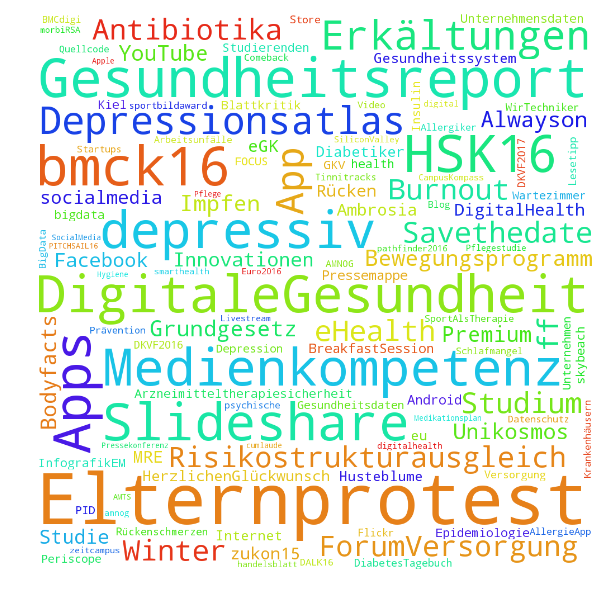

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

from wordcloud import WordCloud
 
wordcloud = WordCloud(
    width=1000,height=1000,
    background_color="white").generate_from_frequencies(taglist.items())
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off"); 

In [40]:
df[['cde.content.sentiment.polarity','message.body','message.twitter_entities.hashtags']]

,cde.content.sentiment.polarity,message.body,message.twitter_entities.hashtags
0,NEGATIVE,RT @TK_Presse: So #depressiv ist Deutschland. ...,"[{u'indices': [18, 28], u'text': u'depressiv'}..."
1,NEUTRAL,@TK_Presse @aerztezeitung den bekommt man in d...,[]
2,NEUTRAL,RT @LUPCOM: THX4RT/FAV/MT ;) #ff \n@ToyotaEqui...,"[{u'indices': [29, 32], u'text': u'ff'}]"
3,POSITIVE,"RT @slangemak: ""8min intensiver Sport sind so ...",[]
4,NEUTRAL,RT @TK_Presse: 54% teilen sich die #Pflege mit...,"[{u'indices': [35, 42], u'text': u'Pflege'}]"
5,NaN,This week's favorite #eu #health tweets by @Ma...,"[{u'indices': [21, 24], u'text': u'eu'}, {u'in..."
6,NEUTRAL,RT @TK_Presse: 2014 im Nordosten am meisten Fe...,"[{u'indices': [59, 66], u'text': u'Rücken'}, {..."
7,POSITIVE,RT @TK_Presse: Nur jeder zweite Deutsche ist r...,"[{u'indices': [92, 104], u'text': u'Wartezimme..."
8,NEUTRAL,RT @TK_Presse: Hier geht's zur neuen TK-#Aller...,"[{u'indices': [40, 52], u'text': u'AllergieApp..."
9,NEUTRAL,@mundauf @percidae @TK_Presse ALT? WER IST HIE...,[]


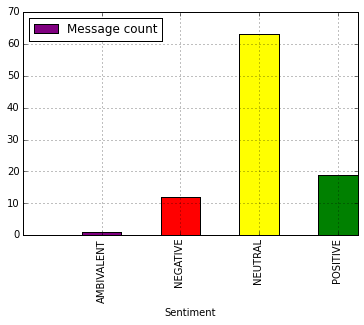

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30.0, 30.0)
%matplotlib inline

dx = df[['cde.content.sentiment.polarity','message.body']]
dx.columns = ['Sentiment', 'Body']
dxSent = dx.groupby(['Sentiment']).count()

dxSent.columns = ['Message count']

dxSent.plot(kind='bar', color=['purple', 'red', 'yellow', 'green'])